In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

##### READ THE DATASET

In [3]:
data=pd.read_csv("webmd.csv")

In [4]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


#### Preprocessing

In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [8]:
data.Reviews.unique()

array(["I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.",
       'cleared me right up even with my throat hurting it went away after taking the medicine',
       'why did my PTINR go from a normal of 2.5 to over \n100?', ...,
       "As long as I was on chantix, I didn't smoke.  Terrible stomach upset after each dose, constipation, headaches constantly, crazy dreams and mood swings.  I have had to stop taking it and have found other ways to stop smoking.",
       "Started this medication Oct 5th 2008. Haven't smoked for 6 weeks and planning on the full 12 weeks program.  I have had some problems like getting sick after the meds but accually it helps because everytime I see a smoker or smell smoke I get sick, still want one but it offsets it.",
       "One year ago, I tried Chantix and had to stop taking i

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

##### CHECKING DUPLICATES

In [11]:
data[data.duplicated()].shape

(943, 12)

In [12]:
data[data.duplicated()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
12102,55-64,High Blood Pressure,5/22/2013,lisinopril solution,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
17120,55-64,High Blood Pressure,5/22/2013,lisinopril,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
21816,75 or over,Other,9/6/2015,lucentis vial,144667,1,1,My father was in end stage Macular degenration...,1,Male,Mild discomfort and increased tears may occur ...,0
22427,35-44,Abnormally Long or Heavy Periods,8/22/2019,larin fe,165169,4,4,Tired and nauseous the first week taking Larin...,4,Female,"Nausea , vomiting , headache , bloating , ...",0
24302,25-34,Fungal Infection of Fingernails - Onychomycosis,8/3/2019,lamisil tablet,12422,2,2,Had a rare-ish fungal infection starting at th...,1,,Diarrhea or stomach upset may occur.,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339647,55-64,Diverticulitis,8/9/2019,cipro,1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
339648,55-64,Diverticulitis,8/9/2019,"cipro suspension, microcapsule reconstituted",1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
343090,25-34,Excessive Sweating,9/20/2019,clonidine hcl er,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, tir...",0
343390,25-34,Excessive Sweating,9/20/2019,clonidine hcl,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, dr...",0


In [13]:
data=data.drop_duplicates()

In [14]:
data[data.duplicated()].shape

(0, 12)

##### CHECKING OUTLIERS

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

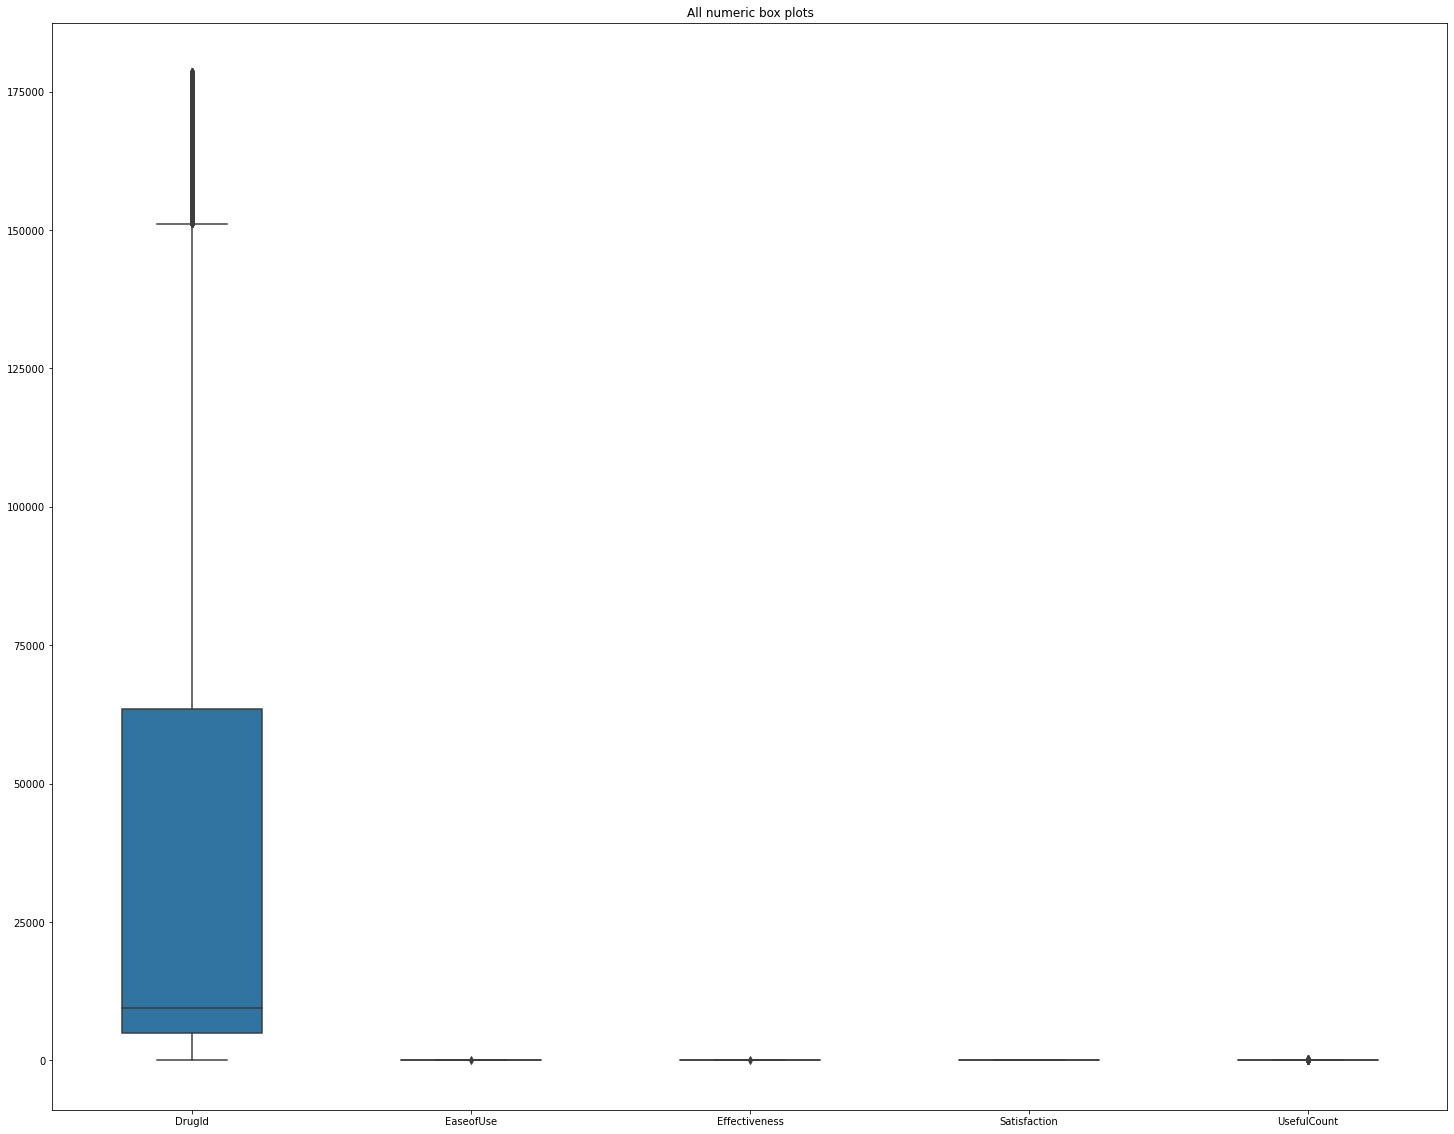

In [16]:
plt.figure(figsize=(25,20))
sns.boxplot(data=data.select_dtypes(include = ['int64']),width=0.5)
plt.title('All numeric box plots')
plt.show()

##### Exploratory Data Analysis

In [17]:
data['Sides'].describe()

count     361826
unique      1651
top             
freq       17058
Name: Sides, dtype: object

In [18]:
no_side=data.index[data['Sides'].apply(lambda x: x==' ')].tolist()

for i in no_side:
    data.loc[data.index==i,'Sides']='No side Effect .'  

In [19]:
data.loc[data.index, 'Sides'] = '[' + data['Sides'].astype(str)

In [20]:
data.loc[data.index, 'Sides'] = data['Sides'].astype(str) + ']'

In [21]:
def clean (li):
    li=li.replace('"','')
    li=li.replace(',',' ","')
    li=li.replace('[','["')
    li=li.replace(']',' "] ')
    li=li.replace('.',' ')
    
    return li

In [22]:
data['Sides']=data['Sides'].apply(clean)

In [23]:
data['Sides']=data['Sides'].apply(eval)

In [24]:
data['Sides']

0         [Drowsiness ,   dizziness  ,   dry mouth /nose...
1         [Drowsiness ,   dizziness  ,   dry mouth /nose...
2                                       [No side Effect   ]
3                                       [No side Effect   ]
4                                       [No side Effect   ]
                                ...                        
362801    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362802    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362803    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362804    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362805    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
Name: Sides, Length: 361826, dtype: object

In [25]:
from collections import Counter

In [26]:
top_Sides =[ m[0] for m in Counter([i for j in data.Sides for i in j]).most_common(8)]

In [27]:
top_Sides

['  dizziness  ',
 'Nausea  ',
 '  vomiting  ',
 '  constipation  ',
 ' drowsiness ',
 '  headache  ',
 '  lightheadedness  ',
 '  dry mouth  ']

In [28]:
data["Sides_count"]=data['Sides'].apply(lambda x: len(x))

In [29]:
def categorise(row):  
    if row['Sides_count'] <= 4:
        return 0
    if row['Sides_count'] >4 and row['Sides_count'] <= 8:
        return 1
    if row['Sides_count'] > 8  and row['Sides_count'] <=12:
        return 2
    
    return 3

In [30]:
data['Sides_class'] = data.apply(lambda row: categorise(row), axis=1)

In [31]:
data[data['Sides_class']==2].head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class
3326,19-24,Pinworm Infection,5/8/2015,pyrantel pamoate suspension,9999,5,5,I went to the doctors because I noticed I had ...,5,Female,"[Nausea , vomiting , diarrhea , stoma...",7,9,2
3327,25-34,Pinworm Infection,7/27/2014,pyrantel pamoate suspension,9999,3,5,I had a horrible pinworm infestation that was ...,5,Female,"[Nausea , vomiting , diarrhea , stoma...",13,9,2


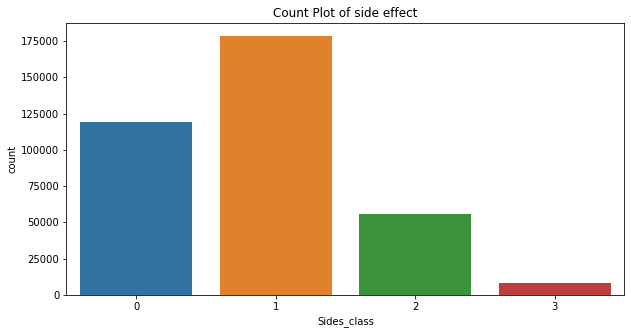

<Figure size 1080x360 with 0 Axes>

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sides_class',data=data)
plt.title("Count Plot of side effect" )
plt.figure(figsize=(15,5))
plt.tight_layout()
plt.show()

##### Age

In [33]:
data['Age'].value_counts().to_frame()

,Age
45-54,79857
55-64,74836
35-44,54948
25-34,49479
65-74,41121
19-24,24228
75 or over,15188
,12145
13-18,7045
7-12,1644


In [34]:
data['Age'].unique().tolist()

['75 or over',
 '25-34',
 '65-74',
 '35-44',
 '55-64',
 '45-54',
 '19-24',
 ' ',
 '13-18',
 '7-12',
 '0-2',
 '3-6']

In [35]:
data[data['Age']==' ']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class
12,,Birth Control,7/3/2018,lyza,164750,2,1,This stuff needs to be removed from the market...,1,Female,"[Nausea , vomiting , headache , bloat...",0,6,1
73,,Abnormally Long or Heavy Periods,10/3/2012,lysteda,154120,5,5,54 YO with uterine fibroids and HEAVY clotting...,5,,"[Nausea , vomiting , diarrhea , and m...",10,4,0
91,,Abnormally Long or Heavy Periods,4/10/2012,lysteda,154120,3,4,I am 45 years old with fibroids. I have had he...,1,Female,"[Nausea , vomiting , diarrhea , and m...",18,4,0
184,,Neuropathic Pain,2/29/2020,lyrica,93965,5,5,No Script or health Insurance needed to place ...,5,,"[Drowsiness , dizziness , dry mouth , ...",12,6,1
185,,Nerve Pain after Herpes,2/24/2020,lyrica,93965,5,5,After using Lyrica for 3 weeks it really ly wo...,5,Male,"[Drowsiness , dizziness , dry mouth , ...",0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362517,,Stop Smoking,3/31/2010,chantix,144470,4,4,my husband and i are on chantix. saturday apri...,4,,"[Nausea , headache , vomiting , drowsi...",3,9,2
362571,,Stop Smoking,1/19/2010,chantix,144470,5,5,,3,,"[Nausea , headache , vomiting , drowsi...",0,9,2
362598,,Stop Smoking,12/9/2009,chantix,144470,5,5,,1,Male,"[Nausea , headache , vomiting , drowsi...",1,9,2
362645,,Stop Smoking,2/26/2009,chantix,144470,5,3,I have just started to take this medication. T...,3,,"[Nausea , headache , vomiting , drowsi...",9,9,2


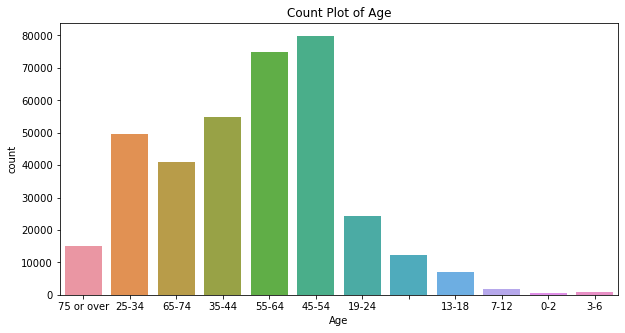

<Figure size 1080x360 with 0 Axes>

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=data)
plt.title("Count Plot of Age" )
plt.figure(figsize=(15,5))
plt.tight_layout()
plt.show()

Condition

In [37]:
data[data['Condition']==' '].Condition.count()

43

In [38]:
condition_null=data.index[data['Condition'].apply(lambda x: x==' ')].tolist()

for i in condition_null:
    data.loc[data.index==i,'Condition']='Not mentioned'  

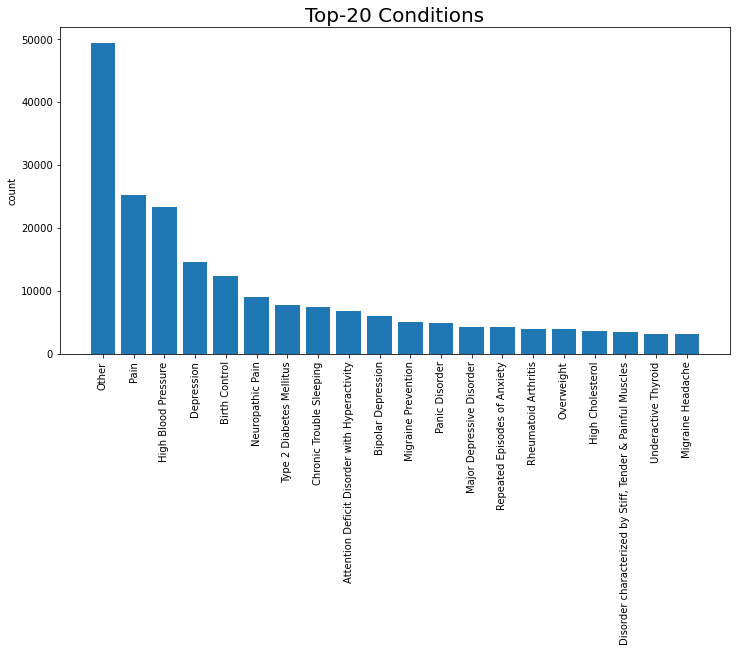

In [92]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions =data['Condition'].value_counts(ascending = False).head(20)
plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

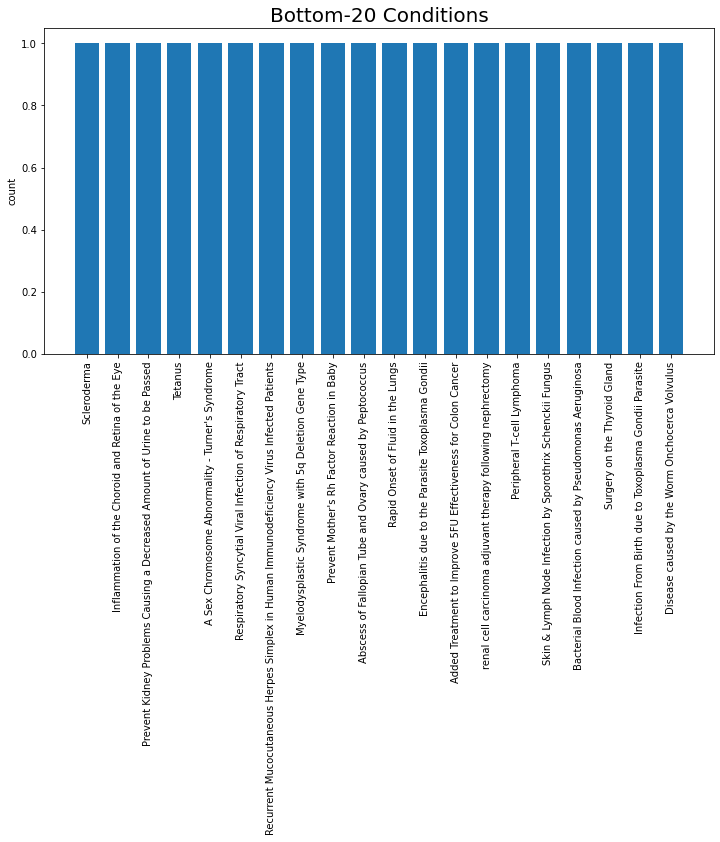

In [93]:
#plot a bargraph to check bottom 20 conditions
plt.figure(figsize=(12,6))
conditions_bottom =data['Condition'].value_counts(ascending = False).tail(20)
plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [94]:
table=pd.crosstab(index=data['Sides_class'],columns=data['Condition'])

In [95]:
table

Condition,"""Change of Life"" Signs",A Breaking Out of the Skin Resembling Acne,A Chronic Multisystem Inflammatory Disorder,A Condition in which Hair Falls Out in Patches,A Condition of Bladder Dysfunction from Nerve Disorder,A Feeling of Restlessness with Inability to Sit Still,A Fungal Infection - Aspergillosis,A Hereditary Progressive Anemia of Unknown Cause,A Lack of Fatty Acids,A Malignant Pigmented Mole or Tumor,...,malignant tumor or cancer,neurotrophic keratitis,non-metastatic castration-resistant prostate cancer,osteoporosis in postmenopausal woman at high risk for fracture,pemphigus vulgaris,primary progressive multiple sclerosis,raised seborrheic keratosis,refractory lung disease due to MAC,renal cell carcinoma adjuvant therapy following nephrectomy,seborrheic dermatitis of scalp
Sides_class,,,,,,,,,,,,,,,,,,,,,
0,42,3,0,1,0,0,4,0,0,1,...,3,0,1,4,0,1,4,0,0,5
1,1719,0,11,3,9,259,12,29,1,0,...,1,2,1,0,3,0,0,1,0,0
2,807,0,0,0,7,1,1,1,0,9,...,2,0,0,2,0,0,0,0,1,0
3,0,0,0,0,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### DRUG

In [39]:
data['Drug'].describe()

count       361826
unique        7093
top       cymbalta
freq          4646
Name: Drug, dtype: object

In [40]:
data[['DrugId','Drug']]

,DrugId,Drug
0,146724,25dph-7.5peh
1,146724,25dph-7.5peh
2,144731,warfarin (bulk) 100 % powder
3,144731,warfarin (bulk) 100 % powder
4,144731,warfarin (bulk) 100 % powder
...,...,...
362801,144470,chantix
362802,144470,chantix
362803,144470,chantix
362804,144470,chantix


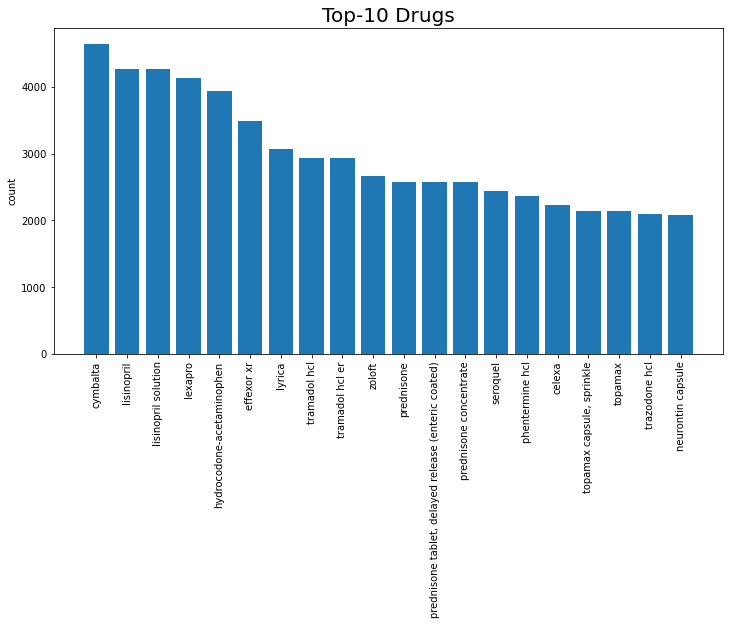

In [41]:
#plot a bargraph to check top 10 Drug
plt.figure(figsize=(12,6))
drugs =data['Drug'].value_counts(ascending = False).head(20)
plt.bar(drugs.index,drugs.values)
plt.title('Top-10 Drugs',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

##### SEX

In [42]:
data.Sex.value_counts()


Female    237735
Male       97657
           26434
Name: Sex, dtype: int64

In [43]:
no_sex=data.index[data['Sex'].apply(lambda x: x==' ')].tolist()

for i in no_sex:
    data.loc[data.index==i,'Sex']='Not mentioned'  

Text(0, 0.5, 'Count')

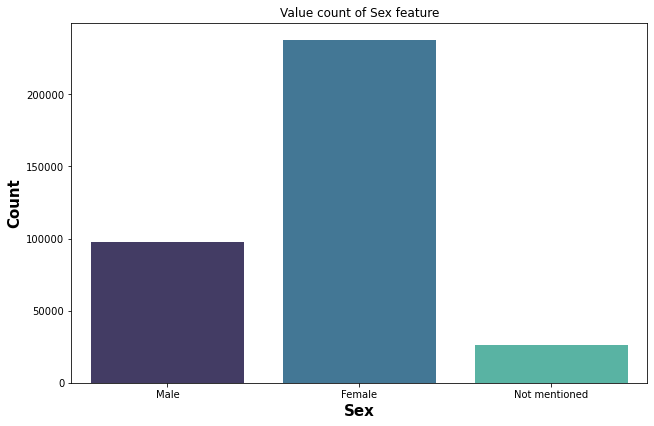

In [44]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = data, x = 'Sex', palette='mako')
plt.title('Value count of Sex feature')
ax.set_xlabel("Sex",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

##### Reviews

In [45]:
data.Reviews.describe()

count     361826
unique    250167
top             
freq       41700
Name: Reviews, dtype: object

In [46]:
data['Reviews'][0]

"I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently."

In [47]:
data['review1'] = data['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review1'].head()

0    i'm a retired physician and of all the meds i ...
1    cleared me right up even with my throat hurtin...
2    why did my ptinr go from a normal of 2.5 to ov...
3                         falling and don't realise it
4    my grandfather was prescribed this medication ...
Name: review1, dtype: object

In [48]:
data['eview1'] = data['review1'].str.replace('[^\w\s]', '')

Removing stop words

In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Remove the Rare words

In [51]:
freq = pd.Series(' '.join(data['review1']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
less_freq

['all..amazing!(especially',
 'wishy',
 "business...it's",
 'wic',
 'treatment,no',
 'but,hey,',
 'libio',
 'robaxin(3x/day)',
 'oblong?',
 '20cmg',
 'easy!.',
 'job.(jailer)',
 'latida',
 'washy',
 'me)..unit',
 'diabetics)',
 'arround.',
 'burns.i',
 '20mcg..fridge',
 'days..sure',
 'keratosis;',
 'baggie,',
 'ever.it',
 'onevertebra',
 'defecate!',
 'rest..and',
 'prayed.',
 'night.....you',
 'painful,humongous',
 '136lbs',
 'fussion(2',
 'soma(4x/day),',
 '(well...waste',
 'nuisances',
 'using.if',
 'ears.dizziness,no',
 'inaccurate,',
 'bam..i',
 'on-the-job',
 'working.now',
 'shot..not',
 'fine~~although',
 '120/64.',
 'warm-soothing',
 'side,effects,upset-tummy',
 'time.lantus',
 'reconmended',
 'stars!!!',
 'leasioins',
 'weight,all',
 'l-4,5',
 '(edex).',
 'percise',
 'head.ringing',
 '5-6$',
 'bowe.',
 'edex...my',
 'well...be',
 'swab,',
 'bit..drug',
 'zaps,in',
 'guys..we',
 'away--still',
 'vivid!',
 'get..its',
 'clornazapan',
 'weaps,',
 'all,45',
 'fullfilled,',
 'now

In [52]:
pip install textblob

In [53]:
from textblob import TextBlob

In [54]:
def get_sentiment(text):
    blob=TextBlob(text)
    return sentiment.polarity
def get_sentiment_label(text):
    blob=TextBlob(text)
    if blob.polarity>0:
        result='positive'
    elif blob.polarity<0:
        result='negative'
    else:
        result='neutral'
    return result

In [55]:
data['Sentiment_label']=data['review1'].apply(get_sentiment_label)

<AxesSubplot:>

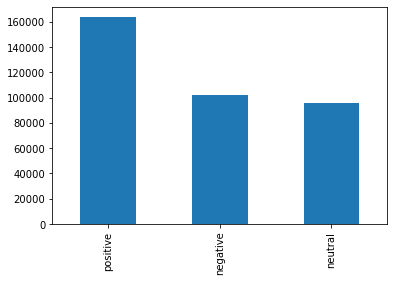

In [56]:
data['Sentiment_label'].value_counts().plot(kind='bar')

In [57]:
data[['Satisfaction','Sentiment_label','UsefulCount']].head(20)

,Satisfaction,Sentiment_label,UsefulCount
0,5,positive,0
1,5,positive,1
2,3,positive,0
3,1,neutral,0
4,1,positive,1
5,4,neutral,0
6,2,negative,0
7,5,neutral,0
8,2,neutral,1
9,2,neutral,0


ENCODING

In [58]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class', 'review1', 'eview1',
       'Sentiment_label'],
      dtype='object')

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}
cat_data=['Age','Sex','Sentiment_label']
for i in cat_data:
    label_encoder[i] = LabelEncoder()
    data[i] = label_encoder[i].fit_transform(data[i]) 

In [60]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class,review1,eview1,Sentiment_label
0,11,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,1,"[Drowsiness , dizziness , dry mouth /nose...",0,7,1,i'm retired physician meds tried allergies (se...,im a retired physician and of all the meds i h...,2
1,4,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,0,"[Drowsiness , dizziness , dry mouth /nose...",1,7,1,cleared right even throat hurting went away ta...,cleared me right up even with my throat hurtin...,2
2,9,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,0,[No side Effect ],0,1,0,ptinr go normal 2.5 100?,why did my ptinr go from a normal of 25 to ove...,2
3,11,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,0,[No side Effect ],0,1,0,falling realise,falling and dont realise it,1
4,6,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,1,[No side Effect ],1,1,0,grandfather prescribed medication (coumadin) a...,my grandfather was prescribed this medication ...,2


In [88]:
data.Condition.value_counts()

Other                                                         49332
Pain                                                          25199
High Blood Pressure                                           23268
Depression                                                    14505
Birth Control                                                 12251
                                                              ...  
Skin & Lymph Node Infection by Sporothrix Schenckii Fungus        1
Bacterial Blood Infection caused by Pseudomonas Aeruginosa        1
Surgery on the Thyroid Gland                                      1
Infection From Birth due to Toxoplasma Gondii Parasite            1
Disease caused by the Worm Onchocerca Volvulus                    1
Name: Condition, Length: 1805, dtype: int64

In [89]:
data.Condition.value_counts().to_dict()

{'Other': 49332,
 'Pain': 25199,
 'High Blood Pressure': 23268,
 'Depression': 14505,
 'Birth Control': 12251,
 'Neuropathic Pain': 8988,
 'Type 2 Diabetes Mellitus': 7646,
 'Chronic Trouble Sleeping': 7405,
 'Attention Deficit Disorder with Hyperactivity': 6800,
 'Bipolar Depression': 5946,
 'Migraine Prevention': 4988,
 'Panic Disorder': 4867,
 'Major Depressive Disorder': 4254,
 'Repeated Episodes of Anxiety': 4138,
 'Rheumatoid Arthritis': 3963,
 'Overweight': 3888,
 'High Cholesterol': 3592,
 'Disorder characterized by Stiff, Tender & Painful Muscles': 3471,
 'Underactive Thyroid': 3153,
 'Migraine Headache': 3045,
 'Anxious': 3015,
 'Chronic Pain': 2911,
 'Asthma': 2585,
 '"Change of Life" Signs': 2568,
 'Cough': 2563,
 'Acne': 2517,
 'Joint Damage causing Pain and Loss of Function': 2451,
 'Pain Originating From a Nerve': 2398,
 'Muscle Spasm': 2008,
 'Condition in which Stomach Acid is Pushed Into the Esophagus': 1915,
 'Stop Smoking': 1749,
 'Combined High Blood Cholesterol an

In [96]:
for g in conditions.index:
    data['condition_' + g] = data['Condition'].apply(lambda x: 1 if g == x else 0)

In [97]:
data.shape

(361826, 37)

In [98]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class', 'review1', 'eview1',
       'Sentiment_label', 'condition_Other', 'condition_Pain',
       'condition_High Blood Pressure', 'condition_Depression',
       'condition_Birth Control', 'condition_Neuropathic Pain',
       'condition_Type 2 Diabetes Mellitus',
       'condition_Chronic Trouble Sleeping',
       'condition_Attention Deficit Disorder with Hyperactivity',
       'condition_Bipolar Depression', 'condition_Migraine Prevention',
       'condition_Panic Disorder', 'condition_Major Depressive Disorder',
       'condition_Repeated Episodes of Anxiety',
       'condition_Rheumatoid Arthritis', 'condition_Overweight',
       'condition_High Cholesterol',
       'condition_Disorder characterized by Stiff, Tender & Painful Muscles',
       'condition_Underactive Thyroid', 'condition_Migraine Headache'],


In [99]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,...,condition_Migraine Prevention,condition_Panic Disorder,condition_Major Depressive Disorder,condition_Repeated Episodes of Anxiety,condition_Rheumatoid Arthritis,condition_Overweight,condition_High Cholesterol,"condition_Disorder characterized by Stiff, Tender & Painful Muscles",condition_Underactive Thyroid,condition_Migraine Headache
0,11,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,1,...,0,0,0,0,0,0,0,0,0,0
1,4,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,1,...,0,0,0,0,0,0,0,0,0,0


In [100]:
x=data.drop(['Condition', 'Date','Drug','Reviews','Sides_class','Sides',"review1","eview1"],axis=1)

In [101]:
y=data["Sides_class"]

In [102]:
x

,Age,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Sides_count,Sentiment_label,condition_Other,...,condition_Migraine Prevention,condition_Panic Disorder,condition_Major Depressive Disorder,condition_Repeated Episodes of Anxiety,condition_Rheumatoid Arthritis,condition_Overweight,condition_High Cholesterol,"condition_Disorder characterized by Stiff, Tender & Painful Muscles",condition_Underactive Thyroid,condition_Migraine Headache
0,11,146724,5,5,5,1,0,7,2,0,...,0,0,0,0,0,0,0,0,0,0
1,4,146724,5,5,5,0,1,7,2,0,...,0,0,0,0,0,0,0,0,0,0
2,9,144731,2,3,3,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,11,144731,2,2,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,6,144731,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,8,144470,5,5,5,0,2,9,2,0,...,0,0,0,0,0,0,0,0,0,0
362802,0,144470,2,3,1,2,16,9,0,1,...,0,0,0,0,0,0,0,0,0,0
362803,4,144470,2,4,2,0,3,9,0,0,...,0,0,0,0,0,0,0,0,0,0
362804,8,144470,5,5,5,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
cor_matrix=x.corr().abs()

<AxesSubplot:>

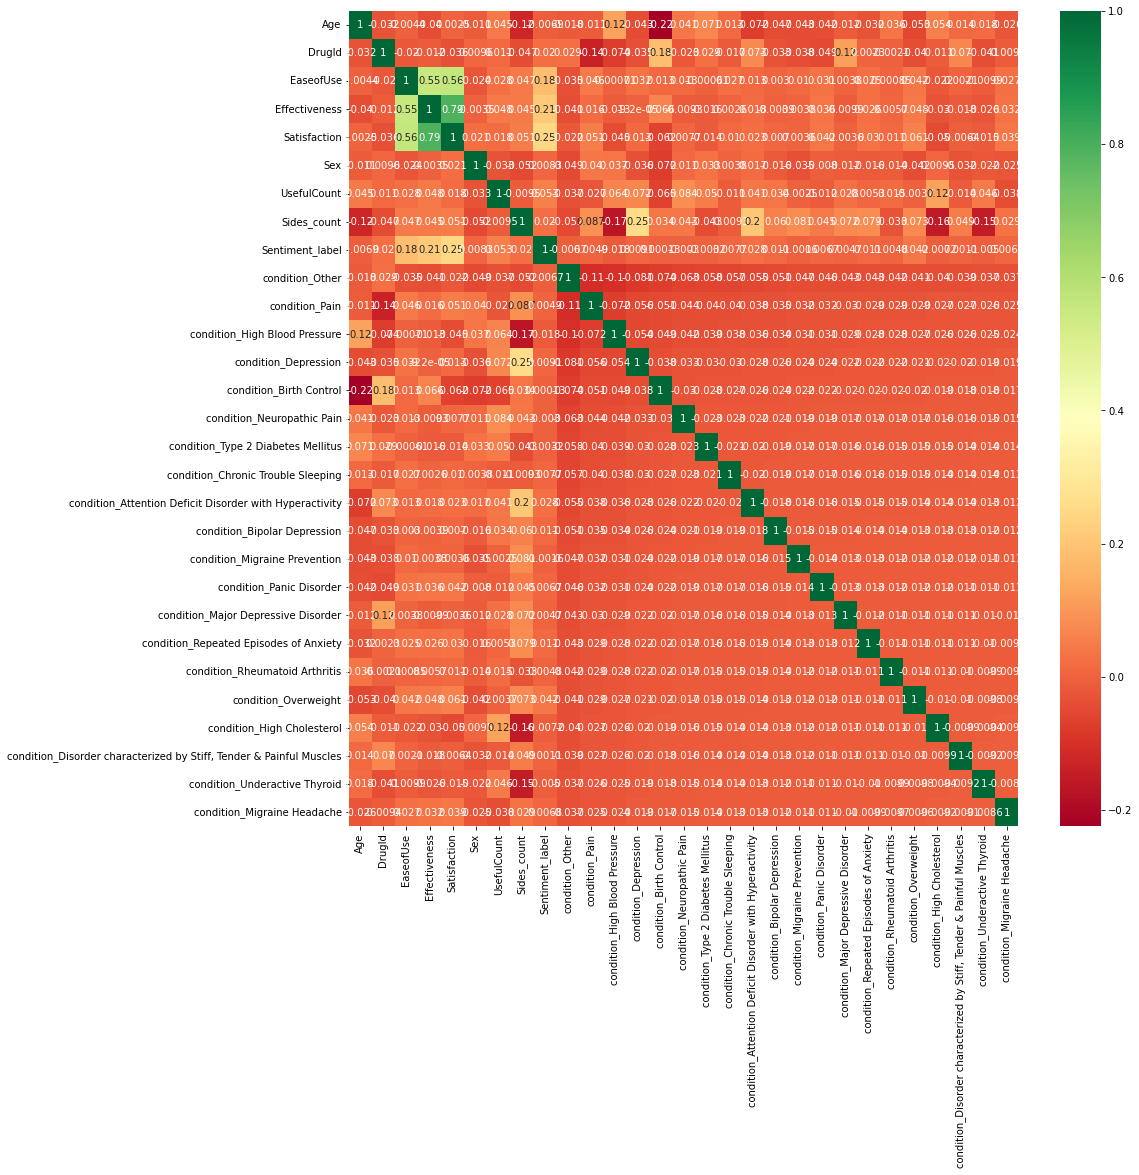

In [104]:
corrmat=x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


##### STANDARD SCALING

In [106]:
#Scaling
from sklearn.preprocessing import  StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [107]:
x_train

array([[ 0.23507595, -0.42247537,  0.74331336, ..., -0.09802643,
        -0.09440561, -0.09258201],
       [ 1.07168386,  1.0453346 , -0.01507823, ..., -0.09802643,
        -0.09440561, -0.09258201],
       [-0.183228  , -0.35594477,  0.74331336, ..., -0.09802643,
        -0.09440561, -0.09258201],
       ...,
       [ 0.23507595, -0.56560195,  0.74331336, ..., -0.09802643,
        -0.09440561, -0.09258201],
       [-1.0198359 ,  2.39539113,  0.74331336, ..., -0.09802643,
        -0.09440561, -0.09258201],
       [ 1.07168386, -0.58426483, -0.01507823, ..., -0.09802643,
        -0.09440561, -0.09258201]])

In [108]:
warnings.filterwarnings("ignore")

##### Modelling

In [109]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, plot_roc_curve,confusion_matrix,classification_report
import warnings

In [110]:
logisreg_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()


In [113]:
clf_list = [logisreg_clf, dt_clf, rf_clf, XGB_clf]
clf_name_list = ['Logistic Regression','Decision Tree', 'Random Forest', 'XGBClassifier']

for clf in clf_list:
    clf.fit(x_train,y_train)

In [114]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train, y_train)}')
    print(f'Test Score: {clf.score(x_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print('======================================================')

Using model: Logistic Regression
Trainning Score: 1.0
Test Score: 1.0
Acc Train: 1.0
Acc Test: 1.0
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 1.0
Acc Train: 1.0
Acc Test: 1.0
Using model: Random Forest
Trainning Score: 1.0
Test Score: 0.9999723627117707
Acc Train: 1.0
Acc Test: 0.9999723627117707
Using model: XGBClassifier
Trainning Score: 1.0
Test Score: 1.0
Acc Train: 1.0
Acc Test: 1.0
